<a href="https://colab.research.google.com/github/jhlee508/handson-ml2-study/blob/master/HoM_Ch4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap04 - 모델 훈련

In [ ]:
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 선형 회귀(Linear Regression)


### 정규방정식

In [ ]:
# 선형 데이터 생성
X = 2 * np.random.rand(100, 1) # 0 ~ 2
y = 4 + 3 * X + np.random.randn(100, 1) #  y = 3*X + 4 + 가우시안 잡음

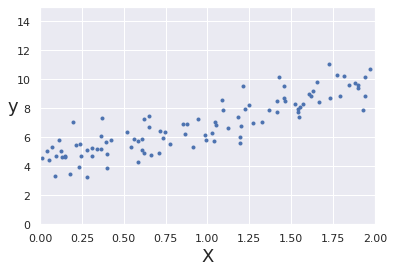

In [ ]:
# 시각화
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # (1, 0), (1, 2)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

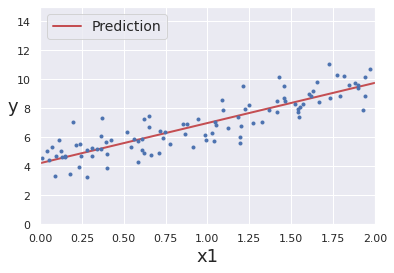

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.plot(X, y, "b.")
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

사이킷런 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

scipy.linalg.lstsq() 함수

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 경사 하강법 

### (배치) 경사 하강법

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000 # epoch
m = 100 # sample 수

theta = np.random.randn(2, 1)  # random initialization

for iter in range(n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if (iter+1) % 100 == 0:
        print('epoch:{},  Weight={}'.format(iter+1, theta))

epoch:100,  Weight=[[4.16104533]
 [2.81783733]]
epoch:200,  Weight=[[4.21338573]
 [2.7716236 ]]
epoch:300,  Weight=[[4.21504203]
 [2.77016118]]
epoch:400,  Weight=[[4.21509444]
 [2.7701149 ]]
epoch:500,  Weight=[[4.2150961 ]
 [2.77011343]]
epoch:600,  Weight=[[4.21509616]
 [2.77011339]]
epoch:700,  Weight=[[4.21509616]
 [2.77011339]]
epoch:800,  Weight=[[4.21509616]
 [2.77011339]]
epoch:900,  Weight=[[4.21509616]
 [2.77011339]]
epoch:1000,  Weight=[[4.21509616]
 [2.77011339]]


In [ ]:
print('최종 결과값 : \n{}'.format(theta))

최종 결과값 : 
[[4.21509616]
 [2.77011339]]


### 확률적 경사 하강법

Learning Rate Schedule

In [ ]:
m = len(X_b)
np.random.seed(42)
n_epochs = 50 # 반복 횟수
t0, t1 = 5, 50 # 학습률 스케줄 

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta - learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
print('최종 결과값 : \n{}'.format(theta))

최종 결과값 : 
[[3.7625155]
 [2.5892927]]


사이킷런 SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### 미니배치 경사 하강법

## 다항 회귀 (Polynomial Regression)

In [ ]:
np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y = 0.5*x^2 + 2x + 2 + 잡음

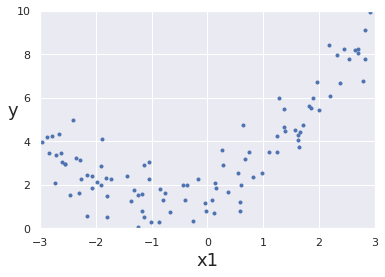

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # 각 특성을 제곱하여 새로운 특성으로 추가
X_poly = poly_features.fit_transform(X)
print('X[0] :', X[0])
print('X_poly[0] :', X_poly[0])

X[0] : [-0.75275929]
X_poly[0] : [-0.75275929  0.56664654]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

## 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 모델의 학습 곡선을 그리는 함수 정의
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")

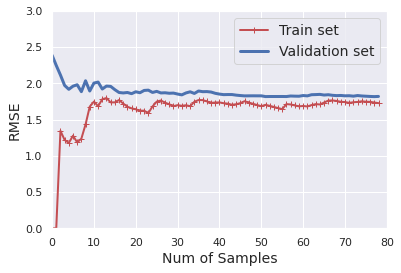

In [ ]:
lin_reg = LinearRegression() # 단순 선형 회귀 모델
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])   
plt.legend(fontsize=14)   
plt.xlabel("Num of Samples", size=14)       
plt.ylabel("RMSE", size=14)                       
plt.show()          

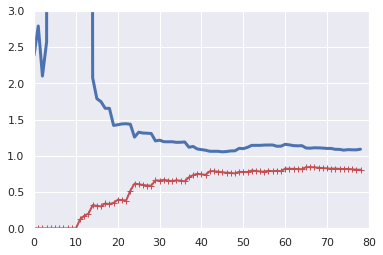

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                   

## 규제(Regularization)가 있는 선형 모델

### 릿지 회귀 (Ridge Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X, y)
LR.predict([[1.5]])

array([[4.82944639]])

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky') 
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [ ]:
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [ ]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.82062962])

### 라쏘 회귀 (Lasso Regression)

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_reg.predict([[1.5]])

array([4.77621741])

In [ ]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.82061471])

### 엘라스틱넷 (Elastic Net)

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

### 조기 종료 (Early Stopping)

In [ ]:
from sklearn.base import clone

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

minimum_val_error = float("inf")
n_epochs = 1000
best_epoch = None
best_model = None

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error - val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        # break

## 로지스틱 회귀 (Logistic Regression)

### 결정 경계


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
import pandas as pd

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = iris['data'][:, 3:]  # 꽃잎 너비
y = (iris['target'] == 2).astype(np.int)  # Verginca면 1 아니면 0

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

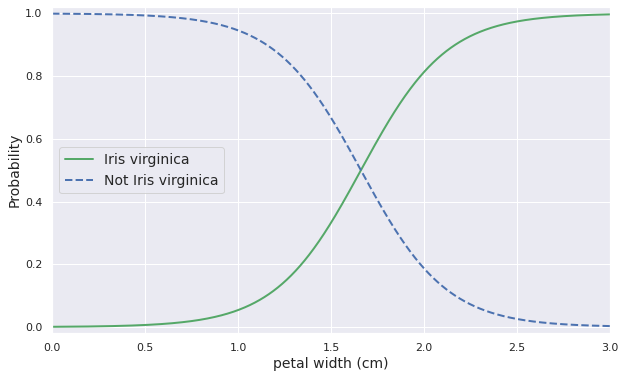

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 6))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.xlabel("petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 소프트맥스 회귀 (Softmax Regression)


In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])